In [10]:
import pandas as pd

spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

In [11]:
spdata['label'] = 0
mpdata['label'] = 1

In [12]:
intersection_columns = list(set(spdata.columns).intersection(set(mpdata.columns)))
data = pd.DataFrame()
data = data.append(spdata[intersection_columns].sample(n=8288, random_state=1))
data = data.append(mpdata[mpdata['Record number recode']==1][intersection_columns])
data

,CS site-specific factor 7 (2004+ varying by schema),"Chemotherapy recode (yes, no/unk)",Derived SEER Combined M (2016+),Sequence number,Derived HER2 Recode (2010+),label,"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)",Patient ID,RX Summ--Surg Prim Site (1998+),...,CS tumor size (2004-2015),Laterality,Radiation recode,Radiation sequence with surgery,COD to site recode,SEER Combined Mets at DX-brain (2010+),"Derived AJCC N, 7th ed (2010-2015)",Age at diagnosis,SEER Combined Mets at DX-bone (2010+),Derived SEER Cmb Stg Grp (2016+)
163549,120,Yes,Blank(s),One primary only,Negative,0,IA,T1c,53170603,23,...,19,Right - origin of primary,Beam radiation,Radiation after surgery,Alive,No,N0,51,No,Blank(s)
86190,90,Yes,Blank(s),One primary only,Negative,0,IA,T1c,27461613,22,...,11,Left - origin of primary,Beam radiation,Radiation after surgery,Alive,No,N0,63,No,Blank(s)
76855,110,No/Unknown,Blank(s),One primary only,Negative,0,IIA,T2,26902737,22,...,22,Right - origin of primary,Beam radiation,Radiation after surgery,Alive,No,N0,61,No,Blank(s)
255979,90,No/Unknown,c0,One primary only,Negative,0,Blank(s),Blank(s),63422132,24,...,Blank(s),Right - origin of primary,None/Unknown,No radiation and/or cancer-directed surgery,Alive,No,Blank(s),54,No,2B
155768,120,Yes,Blank(s),One primary only,Negative,0,IIB,T2,52630161,24,...,22,Right - origin of primary,Beam radiation,Radiation after surgery,Alive,No,N1a,70,No,Blank(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,80,No/Unknown,c0,1st of 2 or more primaries,Negative,1,Blank(s),Blank(s),77692026,23,...,Blank(s),Left - origin of primary,Beam radiation,Radiation after surgery,Pancreas,No,Blank(s),71,No,2A
16568,50,No/Unknown,Blank(s),1st of 2 or more primaries,Negative,1,IA,T1b,77711131,23,...,6,Left - origin of primary,Refused (1988+),No radiation and/or cancer-directed surgery,Alive,No,N0,77,No,Blank(s)
16570,999,No/Unknown,Blank(s),1st of 2 or more primaries,Negative,1,IA,T1c,77731532,0,...,20,Left - origin of primary,None/Unknown,No radiation and/or cancer-directed surgery,Alive,No,N0,74,No,Blank(s)
16572,120,No/Unknown,Blank(s),1st of 2 or more primaries,Negative,1,IA,T1a,77738727,0,...,2,Right - origin of primary,None/Unknown,No radiation and/or cancer-directed surgery,Miscellaneous Malignant Cancer,No,N0,44,No,Blank(s)


In [13]:
from pycaret.classification import *

In [14]:
clf = setup(data, target='label', ignore_features=['Sequence number', 'Patient ID'])

Setup Succesfully Completed!


,Description,Value
0,session_id,8557
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(16576, 37)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,31
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6854,0.7642,0.7523,0.6637,0.7052,0.3708,0.3742,10.0826
1,Gradient Boosting Classifier,0.6834,0.7641,0.7628,0.6584,0.7067,0.3669,0.3717,8.7309
2,Ada Boost Classifier,0.6818,0.7590,0.7439,0.6618,0.7004,0.3636,0.3665,3.3128
3,Ridge Classifier,0.6777,0.0000,0.7268,0.6619,0.6928,0.3553,0.3572,0.3928
4,Logistic Regression,0.6769,0.7421,0.7560,0.6529,0.7006,0.3538,0.3584,0.9283
5,Linear Discriminant Analysis,0.6759,0.7551,0.7237,0.6608,0.6907,0.3519,0.3536,2.0430
6,Light Gradient Boosting Machine,0.6727,0.7531,0.7246,0.6566,0.6889,0.3453,0.3472,0.4024
7,Extreme Gradient Boosting,0.6702,0.7514,0.7129,0.6571,0.6837,0.3403,0.3417,7.5245
8,Extra Trees Classifier,0.6606,0.7364,0.6977,0.6496,0.6727,0.3212,0.3222,3.1633
9,Random Forest Classifier,0.6451,0.7159,0.5917,0.6627,0.6250,0.2902,0.2920,0.2712


In [16]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6873,0.7699,0.7552,0.6646,0.7070,0.3747,0.3783
1,0.6891,0.7625,0.7504,0.6687,0.7072,0.3781,0.3809
2,0.6693,0.7445,0.7435,0.6477,0.6923,0.3384,0.3422
3,0.6750,0.7514,0.7517,0.6517,0.6982,0.3500,0.3542
4,0.7009,0.7713,0.7655,0.6779,0.7190,0.4017,0.4051
5,0.6931,0.7635,0.7586,0.6707,0.7120,0.3862,0.3896
6,0.7009,0.7812,0.7638,0.6784,0.7186,0.4017,0.4049
7,0.6871,0.7746,0.7414,0.6687,0.7032,0.3741,0.3764
8,0.6802,0.7686,0.7379,0.6615,0.6976,0.3603,0.3628
9,0.6716,0.7541,0.7552,0.6470,0.6969,0.3431,0.3480


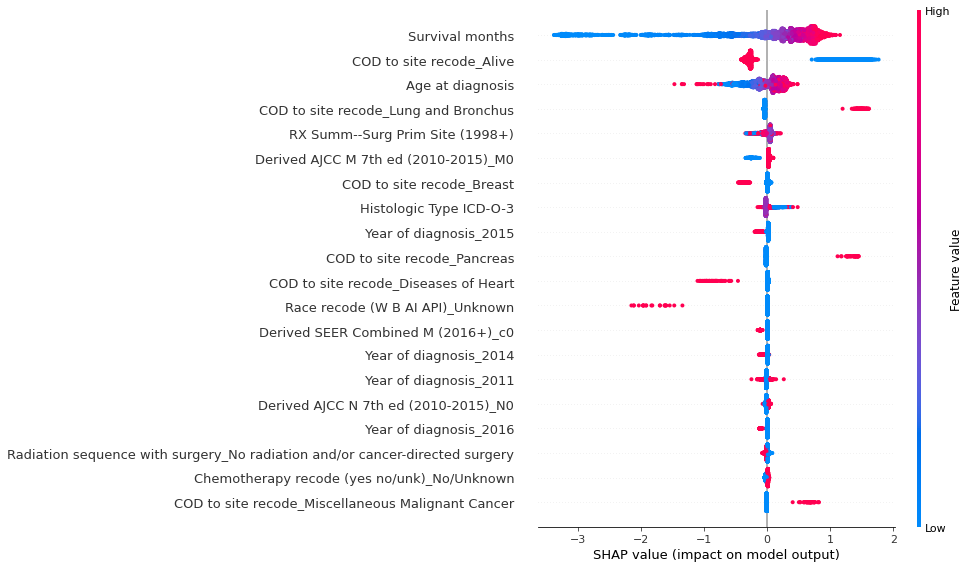

In [20]:
interpret_model(cat)

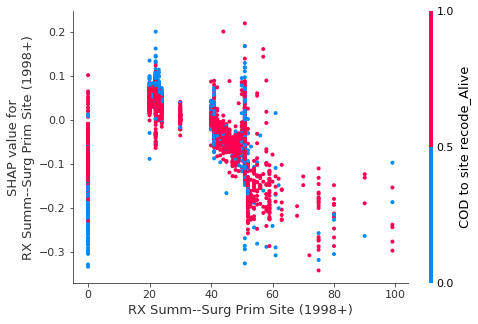

In [21]:
interpret_model(cat, plot = 'correlation')